In [1]:
import numpy as np
import steepest_gradient_descent
import newton
import cd
import cg
import modifiednewton
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

## 問題設定
適当な$\mathbb{R}^{2\times 2}$半正定値行列を作り二次凸計画問題を考える(連立線形方程式)

In [2]:
class Positive_matrix:    
    def __init__(self, n_size = 2):                
        np.random.seed(10)
        A = np.random.random((n_size, n_size))
        self.n_size = n_size        
        self.A = A.T @ A
        self.x0 = np.random.random(len(A))

    def f(self,x):
        return x@self.A@x
    def df(self,x):
        return self.A@x
    def ddf(self,x):
        return self.A

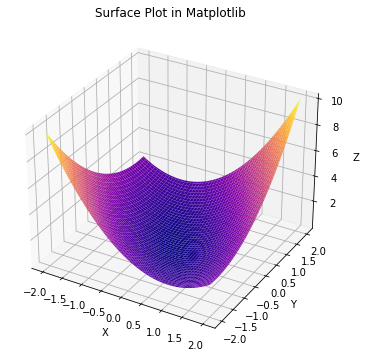

In [3]:
p1 = Positive_matrix()
fig = plt.figure(figsize=(8,6))
ax3d = plt.axes(projection="3d")

xdata = np.linspace(-2,2,100)
ydata = np.linspace(-2,2,100)
X,Y = np.meshgrid(xdata,ydata)
Z = []
for i in range(100):
    for j in range(100):
        x_temp = np.array([xdata[j], ydata[i]])
        Z.append(p1.f(x_temp))   
Z = np.array(Z).reshape(100,100)

ax3d = plt.axes(projection='3d')
ax3d.plot_surface(X, Y, Z,cmap='plasma')
ax3d.set_title('Surface Plot in Matplotlib')
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')

plt.show()

教科書の例題の関数

In [4]:
class Example_fun:    
    def __init__(self):                
        self.x0 = np.array([0.1,0.3])
    def f(self,x):
        return x[0]**4 + x[1]**4 + 3*x[0]**2 * x[1]**2 - 2*x[1]**2
    def df(self,x):        
        return np.array([4*x[0]**3 + 6*x[0]*x[1]**2, 4*x[1]**3 + 6*x[0]**2*x[1] - 4*x[1]])
    def ddf(self,x):
        return np.array([[12*x[0]**2 + 6*x[1]**2, 12*x[0]*x[1]], [12*x[0]*x[1], 12*x[1]**2 - 4]])

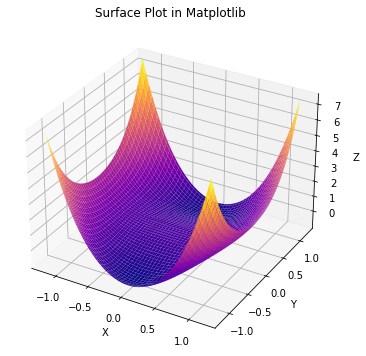

In [5]:
exfun = Example_fun()
fig = plt.figure(figsize=(8,6))
ax3d = plt.axes(projection="3d")

xdata = np.linspace(-1.2,1.2,100)
ydata = np.linspace(-1.2,1.2,100)
X,Y = np.meshgrid(xdata,ydata)
Z = exfun.f([X,Y])

ax3d = plt.axes(projection='3d')
ax3d.plot_surface(X, Y, Z,cmap='plasma')
ax3d.set_title('Surface Plot in Matplotlib')
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')

plt.show()

## 最急降下法

In [6]:
# 問題の設定
f = exfun.f
df = exfun.df
ddf = exfun.ddf
x0 = exfun.x0

optimizer = steepest_gradient_descent.Optimizer(f, df)
optimizer.optimize(x0)
opt_val = optimizer.opt_val
opt_sol = optimizer.opt_sol
path = optimizer.path
print('optimal value : ',opt_val)
print('optimal solution : ', opt_sol)
print("num iterated : ", len(path))

optimal value :  -0.9999999999999539
optimal solution :  [5.02789737e-33 9.99999893e-01]
num iterated :  67


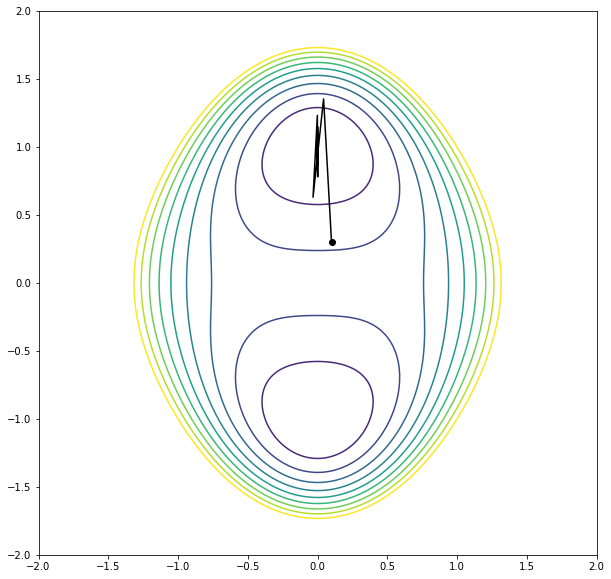

In [7]:
plt.figure(figsize = (10,10))
plt.scatter(x0[0],x0[1], color='k', marker='o')
plt.plot(path[:,0], path[:,1], color='k', linewidth=1.5)
grid_width = 300
xs = np.linspace(-2,2,grid_width)
ys = np.linspace(-2,2,grid_width)
xmesh, ymesh = np.meshgrid(xs, ys)
f_val = []
for i in range(grid_width):
    for j in range(grid_width):
        x_temp = np.array([xs[j], ys[i]])
        f_val.append(f(x_temp))        
f_val = np.array(f_val)        
levels = np.linspace(-1,3,10)
plt.contour(xs, ys, f_val.reshape(xmesh.shape), levels = levels)

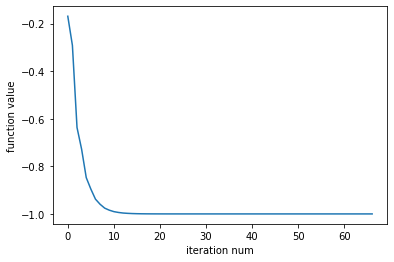

In [8]:
objective_val = []
for temp_sol in path:
    objective_val.append(f(temp_sol))
plt.xlabel('iteration num')
plt.ylabel('function value')
plt.plot(objective_val)

## ニュートン法

In [9]:
optimizer = newton.Optimizer(f, df, ddf)
optimizer.optimize(x0)
opt_val = optimizer.opt_val
opt_sol = optimizer.opt_sol
path = optimizer.path
print('optimal value : ',opt_val)
print('optimal solution : ', opt_sol)
print("num iterated : ", len(path))

optimal value :  1.0590327552796625e-09
optimal solution :  [ 5.70462825e-03 -2.68932226e-29]
num iterated :  11


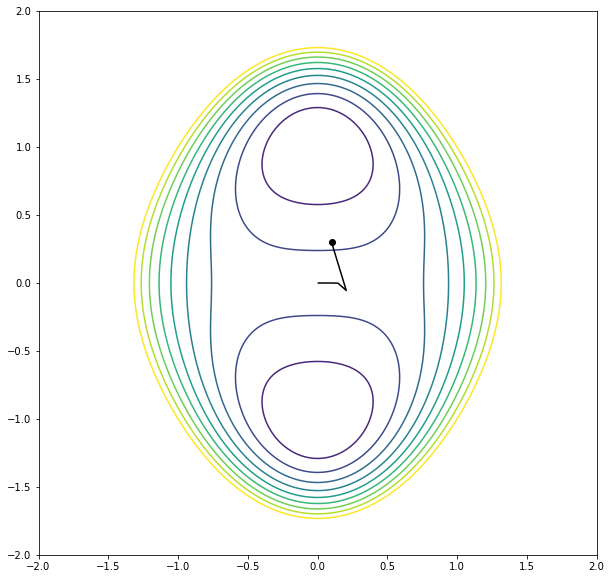

In [10]:
plt.figure(figsize = (10,10))
plt.scatter(x0[0],x0[1], color='k', marker='o')
plt.plot(path[:,0], path[:,1], color='k', linewidth=1.5)
grid_width = 300
xs = np.linspace(-2,2,grid_width)
ys = np.linspace(-2,2,grid_width)
xmesh, ymesh = np.meshgrid(xs, ys)
f_val = []
for i in range(grid_width):
    for j in range(grid_width):
        x_temp = np.array([xs[j], ys[i]])
        f_val.append(f(x_temp))        
f_val = np.array(f_val)        
levels = np.linspace(-1,3,10)
plt.contour(xs, ys, f_val.reshape(xmesh.shape), levels = levels)

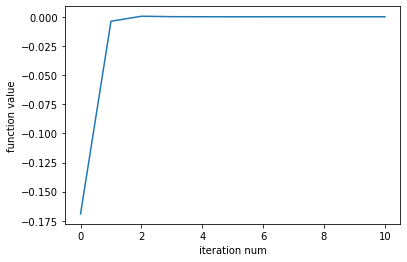

In [11]:
objective_val = []
for temp_sol in path:
    objective_val.append(f(temp_sol))
plt.xlabel('iteration num')
plt.ylabel('function value')
plt.plot(objective_val)

## 修正ニュートン法


In [12]:
optimizer = modifiednewton.Optimizer(f, df, ddf)
optimizer.optimize(x0)
opt_val = optimizer.opt_val
opt_sol = optimizer.opt_sol
path = optimizer.path
print('optimal value : ',opt_val)
print('optimal solution : ', opt_sol)
print("num iterated : ", len(path))

optimal value :  -0.999999999999968
optimal solution :  [1.18193103e-08 1.00000009e+00]
num iterated :  68


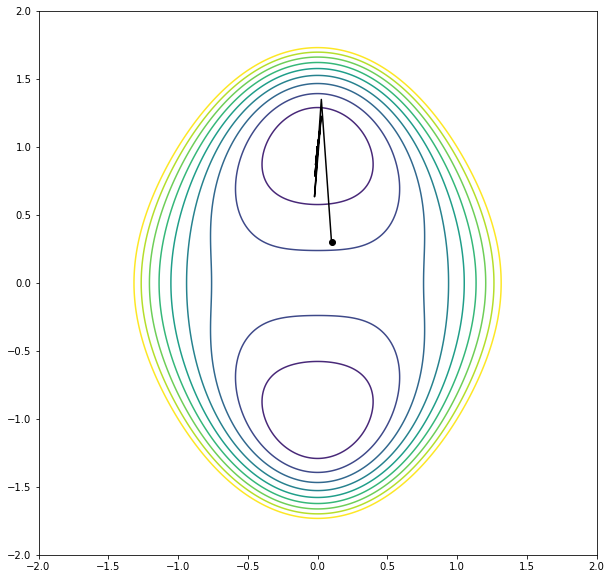

In [13]:
plt.figure(figsize = (10,10))
plt.scatter(x0[0],x0[1], color='k', marker='o')
plt.plot(path[:,0], path[:,1], color='k', linewidth=1.5)
grid_width = 300
xs = np.linspace(-2,2,grid_width)
ys = np.linspace(-2,2,grid_width)
xmesh, ymesh = np.meshgrid(xs, ys)
f_val = []
for i in range(grid_width):
    for j in range(grid_width):
        x_temp = np.array([xs[j], ys[i]])
        f_val.append(f(x_temp))        
f_val = np.array(f_val)        
levels = np.linspace(-1,3,10)
plt.contour(xs, ys, f_val.reshape(xmesh.shape), levels = levels)

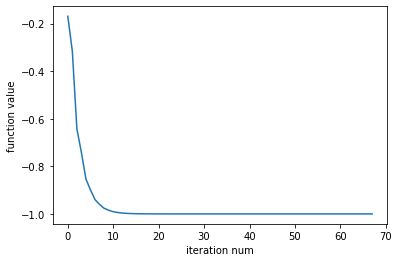

In [14]:
objective_val = []
for temp_sol in path:
    objective_val.append(f(temp_sol))
plt.xlabel('iteration num')
plt.ylabel('function value')
plt.plot(objective_val)

## 共役方向法

In [15]:
# 問題の設定
f = p1.f
df = p1.df
ddf = p1.ddf
x0 = p1.x0

optimizer = cd.Optimizer(f, df, ddf)
optimizer.optimize(x0)
opt_val = optimizer.opt_val
opt_sol = optimizer.opt_sol
path = optimizer.path
print('optimal value : ',opt_val)
print('optimal solution : ', opt_sol)
print("num iterated : ", len(path))

optimal value :  2.4629142271694588e-34
optimal solution :  [ 1.36622450e-17 -2.77555756e-17]
num iterated :  4


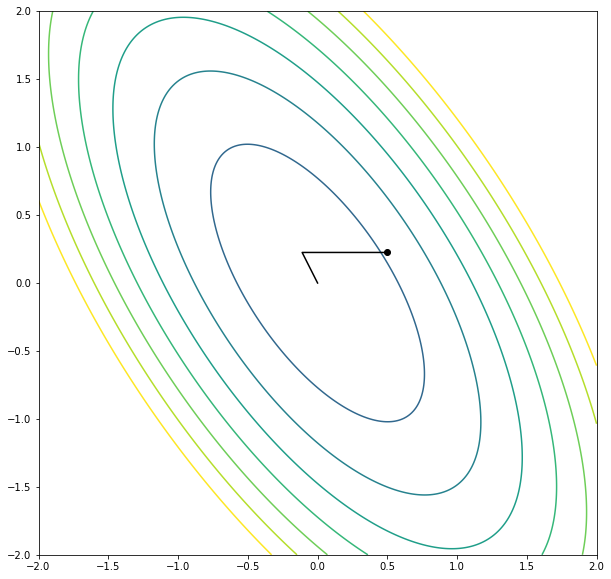

In [16]:
plt.figure(figsize = (10,10))
plt.scatter(x0[0],x0[1], color='k', marker='o')
plt.plot(path[:,0], path[:,1], color='k', linewidth=1.5)
grid_width = 300
xs = np.linspace(-2,2,grid_width)
ys = np.linspace(-2,2,grid_width)
xmesh, ymesh = np.meshgrid(xs, ys)
f_val = []
for i in range(grid_width):
    for j in range(grid_width):
        x_temp = np.array([xs[j], ys[i]])
        f_val.append(f(x_temp))        
f_val = np.array(f_val)        
levels = np.linspace(-1,3,10)
plt.contour(xs, ys, f_val.reshape(xmesh.shape), levels = levels)

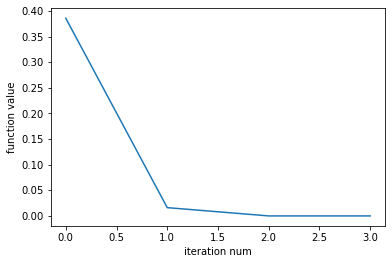

In [17]:
objective_val = []
for temp_sol in path:
    objective_val.append(f(temp_sol))
plt.xlabel('iteration num')
plt.ylabel('function value')
plt.plot(objective_val)

共役方向法で大規模行列の時

In [18]:
# 問題の設定
p = Positive_matrix(100)
f = p.f
df = p.df
ddf = p.ddf
x0 = p.x0

optimizer = cd.Optimizer(f, df, ddf)
optimizer.optimize(x0)
opt_val = optimizer.opt_val
opt_sol = optimizer.opt_sol
path = optimizer.path
print('optimal value : ',opt_val)
#print('optimal solution : ', opt_sol)
print("num iterated : ", len(path))

optimal value :  5.833131464140277e-25
num iterated :  102


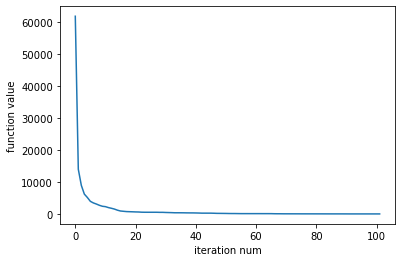

In [19]:
objective_val = []
for temp_sol in path:
    objective_val.append(f(temp_sol))
plt.xlabel('iteration num')
plt.ylabel('function value')
plt.plot(objective_val)

## 共役勾配法

In [20]:
# 問題の設定
f = p1.f
df = p1.df
ddf = p1.ddf
x0 = p1.x0
x0 = [1,1.5]
optimizer = cg.Optimizer(f, df, ddf)
optimizer.optimize(x0)
opt_val = optimizer.opt_val
opt_sol = optimizer.opt_sol
path = optimizer.path
print('optimal value : ',opt_val)
print('optimal solution : ', opt_sol)
print("num iterated : ", len(path))

optimal value :  2.0295420444891392e-32
optimal solution :  [ 1.66533454e-16 -5.55111512e-17]
num iterated :  3


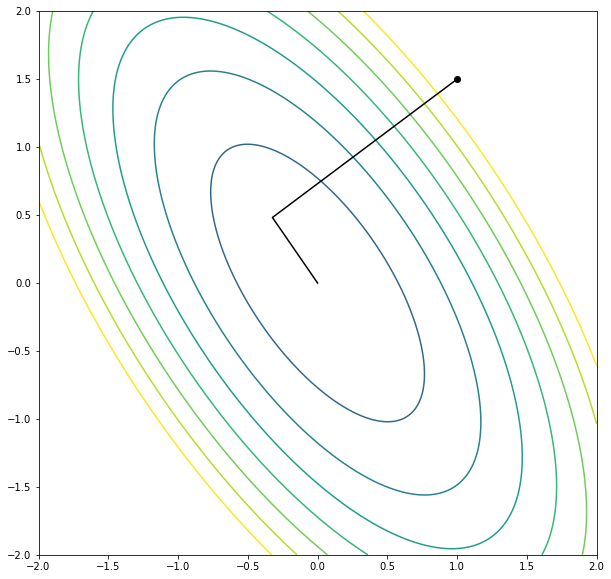

In [21]:
plt.figure(figsize = (10,10))
plt.scatter(x0[0],x0[1], color='k', marker='o')
plt.plot(path[:,0], path[:,1], color='k', linewidth=1.5)
grid_width = 300
xs = np.linspace(-2,2,grid_width)
ys = np.linspace(-2,2,grid_width)
xmesh, ymesh = np.meshgrid(xs, ys)
f_val = []
for i in range(grid_width):
    for j in range(grid_width):
        x_temp = np.array([xs[j], ys[i]])
        f_val.append(f(x_temp))        
f_val = np.array(f_val)        
levels = np.linspace(-1,3,10)
plt.contour(xs, ys, f_val.reshape(xmesh.shape), levels = levels)

共役方向法，共役勾配法，ニュートン法で大規模行列の時比較

In [128]:
from scipy.io import mmread
A = mmread('matrix/nos4.mtx')
A = A.toarray()

In [129]:
f = lambda x: x@A@x
df = lambda x: A@x
ddf = lambda x: A
x0 = np.random.random(A.shape[0])

In [130]:
#行列Aの条件数
np.linalg.cond(A)

1578.4613919529354

In [131]:
A.shape

(100, 100)

### 共役方向法

In [132]:
%%time
optimizer = cd.Optimizer(f, df, ddf)
optimizer.optimize(x0)
opt_val = optimizer.opt_val
opt_sol = optimizer.opt_sol
path = optimizer.path
print('optimal value : ',opt_val)
#print('optimal solution : ', opt_sol)
print("num iterated : ", len(path))

optimal value :  2.3876751294954283e-30
num iterated :  102
CPU times: user 14.9 ms, sys: 2.6 ms, total: 17.5 ms
Wall time: 3.85 ms


### 共役勾配法

In [133]:
%%time
optimizer = cg.Optimizer(f, df, ddf)
optimizer.optimize(x0)
opt_val = optimizer.opt_val
opt_sol = optimizer.opt_sol
path = optimizer.path
print('optimal value : ',opt_val)
#print('optimal solution : ', opt_sol)
print("num iterated : ", len(path))

optimal value :  4.3250333730157465e-12
num iterated :  76
CPU times: user 1.97 ms, sys: 660 µs, total: 2.63 ms
Wall time: 2.15 ms


### ニュートン法

In [134]:
%%time
optimizer = newton.Optimizer(f, df, ddf)
optimizer.optimize(x0)
opt_val = optimizer.opt_val
opt_sol = optimizer.opt_sol
path = optimizer.path
print('optimal value : ',opt_val)
#print('optimal solution : ', opt_sol)
print("num iterated : ", len(path))

optimal value :  1.1124088254079815e-30
num iterated :  2
CPU times: user 395 µs, sys: 86 µs, total: 481 µs
Wall time: 462 µs
